<a href="https://colab.research.google.com/github/Lirgis0/project_yandex_3/blob/main/project_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv',sep = '\t')
pd.options.display.max_columns = 100
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [ ]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.000,108.000,2019-03-07T00:00:00,3,2.700,16.000,51.000,8,NaN,False,False,25.000,NaN,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,7,3350000.000,40.400,2018-12-04T00:00:00,1,NaN,11.000,18.600,1,NaN,False,False,11.000,2.000,посёлок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,10,5196000.000,56.000,2015-08-20T00:00:00,2,NaN,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,0,64900000.000,159.000,2015-07-24T00:00:00,3,NaN,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,2,10000000.000,100.000,2018-06-19T00:00:00,2,3.030,14.000,32.000,13,NaN,False,False,41.000,NaN,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

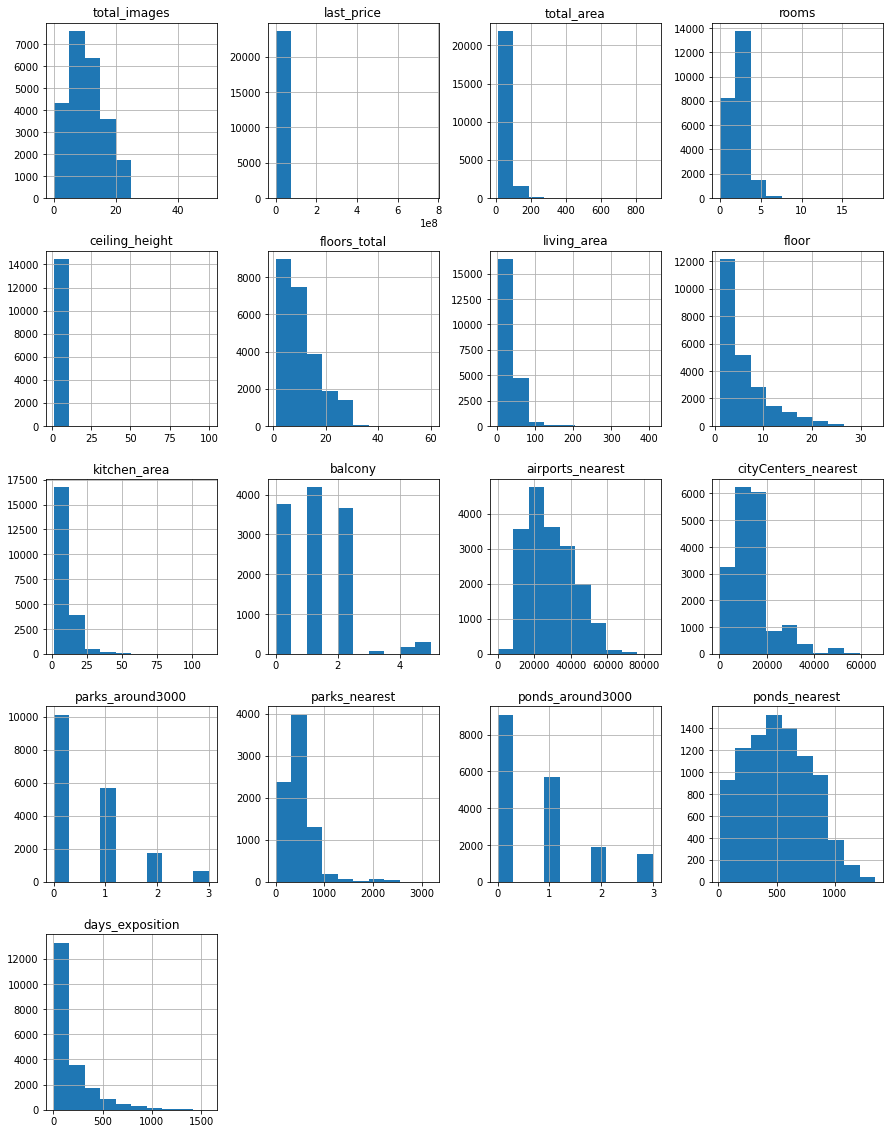

In [ ]:
data.hist(figsize=(15, 20))


### Предобработка данных

In [ ]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [ ]:
data.isna().mean()

total_images           0.000
last_price             0.000
total_area             0.000
first_day_exposition   0.000
rooms                  0.000
ceiling_height         0.388
floors_total           0.004
living_area            0.080
floor                  0.000
is_apartment           0.883
studio                 0.000
open_plan              0.000
kitchen_area           0.096
balcony                0.486
locality_name          0.002
airports_nearest       0.234
cityCenters_nearest    0.233
parks_around3000       0.233
parks_nearest          0.659
ponds_around3000       0.233
ponds_nearest          0.616
days_exposition        0.134
dtype: float64

# Цена

<AxesSubplot:>

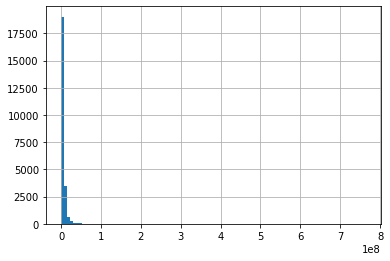

In [ ]:
data['last_price'].hist(bins = 100)

In [ ]:
data['last_price'].describe()

count       23699.000
mean      6541548.772
std      10887013.268
min         12190.000
25%       3400000.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

In [ ]:
data[data['last_price'] > 100000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,135000000.000,310.000,2018-05-22T00:00:00,4,3.300,5.000,250.000,2,NaN,False,False,50.000,NaN,Санкт-Петербург,34159.000,7251.000,2.000,295.000,3.000,190.000,342.000
1026,20,155000000.000,310.000,2018-10-12T00:00:00,5,5.300,3.000,190.000,3,NaN,False,False,63.000,2.000,Санкт-Петербург,24899.000,4785.000,0.000,NaN,1.000,603.000,NaN
1188,20,118000000.000,290.600,2018-06-01T00:00:00,6,3.820,6.000,188.700,3,NaN,False,False,22.000,1.000,Санкт-Петербург,25309.000,6224.000,1.000,217.000,0.000,NaN,316.000
1300,14,120000000.000,280.000,2018-07-12T00:00:00,5,4.700,4.000,162.000,3,NaN,False,False,30.000,NaN,Санкт-Петербург,24680.000,4247.000,1.000,464.000,3.000,339.000,225.000
1436,19,330000000.000,190.000,2018-04-04T00:00:00,3,3.500,7.000,95.000,5,NaN,False,False,40.000,NaN,Санкт-Петербург,23011.000,1197.000,3.000,519.000,3.000,285.000,233.000
1928,11,125000000.000,224.500,2017-01-24T00:00:00,4,NaN,4.000,163.500,3,False,False,False,30.000,1.000,Санкт-Петербург,22805.000,2335.000,0.000,NaN,2.000,497.000,174.000
2243,9,130278280.000,304.000,2015-07-24T00:00:00,5,3.110,9.000,NaN,7,NaN,False,False,NaN,0.000,Санкт-Петербург,25593.000,5913.000,2.000,164.000,0.000,NaN,599.000
2536,16,159984000.000,242.400,2015-08-27T00:00:00,4,3.850,9.000,131.000,7,NaN,False,False,20.000,0.000,Санкт-Петербург,21946.000,2242.000,1.000,679.000,1.000,227.000,501.000
3117,19,140000000.000,631.000,2019-03-30T00:00:00,7,NaN,5.000,NaN,5,NaN,False,False,60.000,NaN,Санкт-Петербург,25707.000,4972.000,0.000,NaN,2.000,210.000,NaN
4996,20,124000000.000,124.500,2017-10-12T00:00:00,4,3.000,4.000,67.200,2,False,False,False,20.000,NaN,Санкт-Петербург,20399.000,1722.000,3.000,302.000,3.000,172.000,45.000


In [ ]:
data[data['last_price'] < 300000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.000,109.000,2019-03-20T00:00:00,2,2.750,25.000,32.000,25,NaN,False,False,40.500,NaN,Санкт-Петербург,36421.000,9176.000,1.000,805.000,0.000,NaN,8.000


In [ ]:
data = data[~(data['last_price'] < 300000)]

Проверили дорогие квартиры, оказалось, что цена вполне оправдана. Удалили одну одну квартиру за 12 тысяч.

# Общая площадь

<AxesSubplot:>

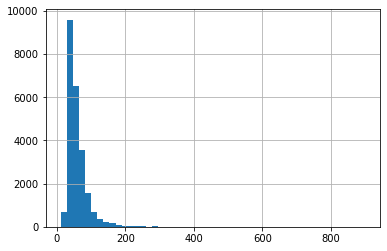

In [ ]:
data['total_area'].hist(bins = 50)

In [ ]:
data['total_area'].describe()

count   23698.000
mean       60.347
std        35.653
min        12.000
25%        40.000
50%        52.000
75%        69.875
max       900.000
Name: total_area, dtype: float64

In [ ]:
data[data['total_area'] > 500]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3117,19,140000000.000,631.000,2019-03-30T00:00:00,7,NaN,5.000,NaN,5,NaN,False,False,60.000,NaN,Санкт-Петербург,25707.000,4972.000,0.000,NaN,2.000,210.000,NaN
4237,1,50000000.000,517.000,2017-10-14T00:00:00,7,NaN,4.000,332.000,3,NaN,False,False,22.000,NaN,Санкт-Петербург,22835.000,1847.000,2.000,477.000,2.000,540.000,NaN
5358,20,65000000.000,590.000,2019-02-14T00:00:00,15,3.500,6.000,409.000,3,NaN,False,False,100.000,NaN,Санкт-Петербург,24447.000,4666.000,1.000,767.000,0.000,NaN,14.000
8018,20,84000000.000,507.000,2015-12-17T00:00:00,5,4.450,7.000,301.500,7,True,False,False,45.500,1.000,Санкт-Петербург,NaN,5735.000,2.000,110.000,0.000,NaN,1078.000
12859,20,140000000.000,631.200,2019-04-09T00:00:00,7,3.900,4.000,322.300,4,NaN,False,False,19.500,1.000,Санкт-Петербург,25707.000,4972.000,0.000,NaN,2.000,210.000,NaN
15651,20,300000000.000,618.000,2017-12-18T00:00:00,7,3.400,7.000,258.000,5,NaN,False,False,70.000,NaN,Санкт-Петербург,32440.000,5297.000,0.000,NaN,2.000,198.000,111.000
19540,8,420000000.000,900.000,2017-12-06T00:00:00,12,2.800,25.000,409.700,25,NaN,False,False,112.000,NaN,Санкт-Петербург,30706.000,7877.000,0.000,NaN,2.000,318.000,106.000


Тут порядок

# Комнаты


<AxesSubplot:>

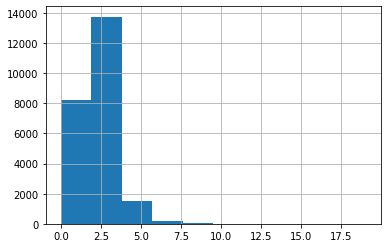

In [ ]:
data['rooms'].hist()

In [ ]:
data[data['rooms'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,17500000.000,183.700,2018-07-01T00:00:00,11,3.400,7.000,138.800,7,NaN,False,False,13.300,NaN,Санкт-Петербург,23606.000,3148.000,0.000,NaN,0.000,NaN,NaN
866,5,25000000.000,363.000,2017-12-23T00:00:00,14,3.160,5.000,222.000,4,NaN,False,False,16.600,NaN,Санкт-Петербург,38076.000,7950.000,0.000,NaN,2.000,435.000,418.000
5358,20,65000000.000,590.000,2019-02-14T00:00:00,15,3.500,6.000,409.000,3,NaN,False,False,100.000,NaN,Санкт-Петербург,24447.000,4666.000,1.000,767.000,0.000,NaN,14.000
9688,8,33000000.000,194.100,2017-02-07T00:00:00,11,3.430,5.000,129.000,2,NaN,False,False,11.900,NaN,Санкт-Петербург,21469.000,1015.000,1.000,686.000,2.000,66.000,813.000
14498,6,32250000.000,374.600,2018-06-09T00:00:00,19,NaN,5.000,264.500,2,NaN,False,False,27.600,NaN,Санкт-Петербург,19497.000,3574.000,0.000,NaN,2.000,548.000,114.000
18848,6,28500000.000,270.000,2015-03-02T00:00:00,16,3.000,4.000,180.000,4,NaN,False,False,13.000,1.000,Санкт-Петербург,23575.000,4142.000,1.000,516.000,0.000,NaN,1365.000
19540,8,420000000.000,900.000,2017-12-06T00:00:00,12,2.800,25.000,409.700,25,NaN,False,False,112.000,NaN,Санкт-Петербург,30706.000,7877.000,0.000,NaN,2.000,318.000,106.000
20829,6,28659000.000,245.400,2016-03-31T00:00:00,14,NaN,4.000,168.300,2,NaN,False,False,25.900,0.000,Санкт-Петербург,21104.000,2054.000,3.000,541.000,2.000,118.000,95.000


In [ ]:
data['rooms'].value_counts()

1     8047
2     7939
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
19       1
16       1
12       1
15       1
Name: rooms, dtype: int64

In [ ]:
data[(data['rooms'] == 0) & (data['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
349,4,2320000.000,25.000,2017-09-27T00:00:00,0,NaN,14.000,17.000,1,NaN,False,True,NaN,0.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.000
508,0,3375000.000,34.400,2017-03-28T00:00:00,0,NaN,26.000,24.300,19,NaN,False,True,NaN,1.000,посёлок Парголово,53115.000,19292.000,0.000,NaN,1.000,593.000,430.000
780,9,2600000.000,26.100,2018-02-20T00:00:00,0,NaN,18.000,NaN,8,NaN,False,True,NaN,1.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.000
839,14,1900000.000,35.000,2017-04-14T00:00:00,0,2.700,5.000,15.000,3,False,False,True,NaN,1.000,поселок Новый Свет,NaN,NaN,NaN,NaN,NaN,NaN,7.000
946,5,2200000.000,23.000,2016-09-27T00:00:00,0,NaN,27.000,18.000,7,NaN,False,True,NaN,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,483.000
1574,0,2200000.000,22.000,2017-11-03T00:00:00,0,NaN,18.000,15.000,16,NaN,False,True,NaN,1.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,81.000
1625,7,1980000.000,23.980,2018-02-01T00:00:00,0,NaN,4.000,10.500,3,NaN,False,True,NaN,1.000,поселок станции Корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.000
2532,5,3500000.000,27.100,2018-02-01T00:00:00,0,NaN,18.000,18.700,9,NaN,False,True,NaN,2.000,Санкт-Петербург,32036.000,8175.000,0.000,NaN,1.000,644.000,70.000
3019,18,2100000.000,24.000,2017-11-10T00:00:00,0,NaN,10.000,18.000,6,NaN,False,True,NaN,2.000,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.000
4115,7,2600000.000,24.000,2018-02-01T00:00:00,0,NaN,25.000,18.000,4,NaN,False,True,NaN,2.000,Санкт-Петербург,10031.000,13330.000,1.000,915.000,0.000,NaN,42.000


In [ ]:
data = data[~((data['rooms'] == 0) & (data['studio'] == False))]

In [ ]:
data[(data['rooms'] == 0) & (data['studio'] == False)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [ ]:
data[(data['rooms'] == 1) & (data['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
2389,5,2250000.000,25.410,2016-06-07T00:00:00,1,NaN,12.000,17.080,8,False,True,False,NaN,2.000,Санкт-Петербург,14125.000,12921.000,2.000,328.000,2.000,485.000,26.000
3187,13,3800000.000,27.000,2016-05-17T00:00:00,1,NaN,14.000,18.000,8,False,True,False,NaN,2.000,Санкт-Петербург,50348.000,16053.000,0.000,NaN,0.000,NaN,45.000
4180,4,4500000.000,34.000,2016-04-25T00:00:00,1,2.800,10.000,21.000,10,False,True,False,NaN,2.000,Санкт-Петербург,23609.000,5299.000,0.000,NaN,1.000,433.000,62.000
8683,10,3500000.000,32.500,2016-05-05T00:00:00,1,3.000,23.000,29.900,11,False,True,False,NaN,2.000,Санкт-Петербург,34967.000,14640.000,0.000,NaN,1.000,564.000,45.000
11026,1,2800000.000,28.000,2016-05-04T00:00:00,1,NaN,26.000,19.000,6,False,True,False,NaN,2.000,посёлок Парголово,53511.000,19687.000,0.000,NaN,0.000,NaN,45.000
12935,10,2200000.000,31.000,2016-05-15T00:00:00,1,2.500,8.000,22.300,5,False,True,False,NaN,1.000,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,44.000
15142,2,2700000.000,30.000,2016-05-10T00:00:00,1,NaN,21.000,26.000,6,False,True,False,NaN,0.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,55.000
18732,4,2400000.000,22.000,2016-05-06T00:00:00,1,NaN,10.000,15.000,6,NaN,True,False,NaN,0.000,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.000
20086,0,1550000.000,22.000,2016-05-11T00:00:00,1,2.700,15.000,10.940,14,False,True,False,NaN,2.000,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,45.000
21702,9,2349000.000,23.400,2016-05-19T00:00:00,1,2.700,20.000,16.000,8,False,True,False,NaN,1.000,деревня Новое Девяткино,NaN,NaN,NaN,NaN,NaN,NaN,34.000


In [ ]:
data['rooms'] = data['rooms'].replace(0,1)

In [ ]:
data[(data['rooms'] == 0) & (data['studio'] == True)]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Тут были странные значения - 0 комнат, те квартиры, которые не были студиями я удалил, а которые были студии, поменял количество комнат на 1. 

# высота потолков

In [ ]:
data['ceiling_height'].unique()

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

<AxesSubplot:>

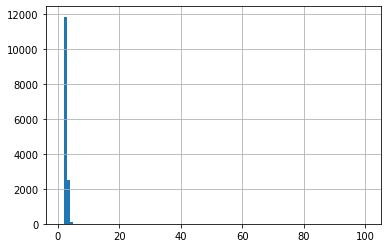

In [ ]:
data['ceiling_height'].hist(bins = 100)

In [ ]:
data[data['ceiling_height'] > 20]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
355,17,3600000.000,55.200,2018-07-12T00:00:00,2,25.000,5.000,32.000,2,False,False,False,NaN,2.000,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.000
3148,14,2900000.000,75.000,2018-11-12T00:00:00,3,32.000,3.000,53.000,2,NaN,False,False,8.000,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4643,0,4300000.000,45.000,2018-02-01T00:00:00,2,25.000,9.000,30.000,2,NaN,False,False,7.000,1.000,Санкт-Петербург,12016.000,13256.000,1.000,658.000,1.000,331.000,181.000
5076,0,3850000.000,30.500,2018-10-03T00:00:00,1,24.000,5.000,19.500,1,True,False,False,5.500,NaN,Санкт-Петербург,29686.000,8389.000,3.000,397.000,1.000,578.000,7.000
5246,0,2500000.000,54.000,2017-10-13T00:00:00,2,27.000,5.000,30.000,3,NaN,False,False,9.000,2.000,деревня Мины,NaN,NaN,NaN,NaN,NaN,NaN,540.000
5669,4,4400000.000,50.000,2017-08-08T00:00:00,2,26.000,9.000,21.300,3,NaN,False,False,7.000,2.000,Санкт-Петербург,28981.000,10912.000,1.000,305.000,0.000,NaN,267.000
5807,17,8150000.000,80.000,2019-01-09T00:00:00,2,27.000,36.000,41.000,13,NaN,False,False,12.000,5.000,Санкт-Петербург,18732.000,20444.000,0.000,NaN,3.000,80.000,38.000
6246,6,3300000.000,44.400,2019-03-25T00:00:00,2,25.000,5.000,31.300,5,NaN,False,False,5.700,NaN,Кронштадт,68923.000,50649.000,1.000,417.000,2.000,73.000,NaN
9379,5,3950000.000,42.000,2017-03-26T00:00:00,3,25.000,5.000,30.000,2,NaN,False,False,5.200,NaN,Санкт-Петербург,11647.000,13581.000,0.000,NaN,0.000,NaN,NaN
10773,8,3800000.000,58.000,2017-10-13T00:00:00,2,27.000,10.000,30.100,3,False,False,False,8.100,2.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,71.000


In [ ]:
data.query('(ceiling_height < 5) and (ceiling_height > 2)').median()

total_images               10.000
last_price            4850000.000
total_area                 53.400
rooms                       2.000
ceiling_height              2.650
floors_total                9.000
living_area                30.800
floor                       4.000
is_apartment                0.000
studio                      0.000
open_plan                   0.000
kitchen_area                9.000
balcony                     1.000
airports_nearest        26752.000
cityCenters_nearest     12966.000
parks_around3000            0.000
parks_nearest             448.000
ponds_around3000            0.000
ponds_nearest             504.000
days_exposition           103.000
dtype: float64

In [ ]:
def fix_potolok (height):
    if height > 5:
        return 2.65
    if height < 2:
        return 2.65
    else:
        return height

In [ ]:
data['ceiling_height'] = data['ceiling_height'].apply(fix_potolok)

In [ ]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

<AxesSubplot:>

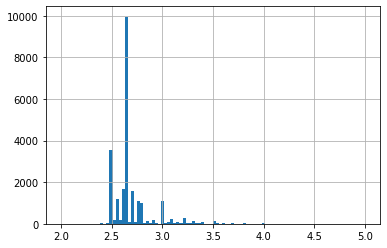

In [ ]:
data['ceiling_height'].hist(bins = 100)

Заменил аномальные и пропущенные значения на медианные

# Всего этажей

<AxesSubplot:>

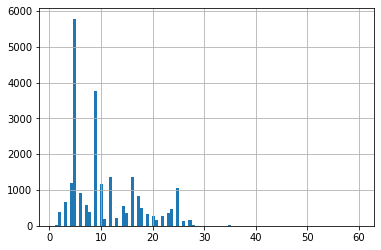

In [ ]:
data['floors_total'].hist(bins = 100)

In [ ]:
data['floors_total'].value_counts()

5.000     5787
9.000     3756
16.000    1373
12.000    1359
4.000     1199
10.000    1172
25.000    1065
6.000      913
17.000     831
3.000      668
7.000      591
14.000     549
18.000     500
24.000     464
8.000      388
2.000      383
15.000     364
23.000     351
19.000     338
22.000     283
20.000     268
13.000     229
11.000     202
27.000     163
21.000     156
26.000     123
1.000       25
35.000      23
28.000      21
36.000       3
37.000       1
34.000       1
33.000       1
60.000       1
29.000       1
52.000       1
Name: floors_total, dtype: int64

In [ ]:
data = data[~(data['floors_total'] > 50)]

In [ ]:
data[data['floors_total'] > 50]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [ ]:
data = data.dropna(subset = ['floors_total'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23551 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23551 non-null  int64  
 1   last_price            23551 non-null  float64
 2   total_area            23551 non-null  float64
 3   first_day_exposition  23551 non-null  object 
 4   rooms                 23551 non-null  int64  
 5   ceiling_height        23551 non-null  float64
 6   floors_total          23551 non-null  float64
 7   living_area           21685 non-null  float64
 8   floor                 23551 non-null  int64  
 9   is_apartment          2774 non-null   object 
 10  studio                23551 non-null  bool   
 11  open_plan             23551 non-null  bool   
 12  kitchen_area          21379 non-null  float64
 13  balcony               12087 non-null  float64
 14  locality_name         23503 non-null  object 
 15  airports_nearest   

Удалил значения 52 и 60 этажей. Пропущенные тоже удалил.

# Жилая площадь

<AxesSubplot:>

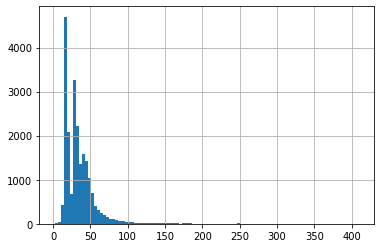

In [ ]:
data['living_area'].hist(bins = 100)

In [ ]:
data[data['living_area'] > 200]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,49950000.000,483.900,2017-10-04T00:00:00,7,3.200,6.000,312.500,4,NaN,False,False,26.400,NaN,Санкт-Петербург,23079.000,945.000,3.000,461.000,3.000,22.000,391.000
793,20,135000000.000,310.000,2018-05-22T00:00:00,4,3.300,5.000,250.000,2,NaN,False,False,50.000,NaN,Санкт-Петербург,34159.000,7251.000,2.000,295.000,3.000,190.000,342.000
866,5,25000000.000,363.000,2017-12-23T00:00:00,14,3.160,5.000,222.000,4,NaN,False,False,16.600,NaN,Санкт-Петербург,38076.000,7950.000,0.000,NaN,2.000,435.000,418.000
1085,16,75000000.000,323.000,2017-07-10T00:00:00,5,4.000,5.000,255.700,4,NaN,False,False,66.000,NaN,Санкт-Петербург,23713.000,594.000,3.000,398.000,2.000,515.000,259.000
1494,10,65000000.000,364.000,2018-11-27T00:00:00,7,3.900,6.000,250.000,3,NaN,False,False,20.000,NaN,Санкт-Петербург,21988.000,3254.000,0.000,NaN,1.000,689.000,46.000
2580,6,30900000.000,338.600,2017-10-16T00:00:00,7,3.860,6.000,230.000,4,NaN,False,False,20.000,NaN,Санкт-Петербург,24957.000,5641.000,0.000,NaN,0.000,NaN,406.000
4237,1,50000000.000,517.000,2017-10-14T00:00:00,7,2.650,4.000,332.000,3,NaN,False,False,22.000,NaN,Санкт-Петербург,22835.000,1847.000,2.000,477.000,2.000,540.000,NaN
5358,20,65000000.000,590.000,2019-02-14T00:00:00,15,3.500,6.000,409.000,3,NaN,False,False,100.000,NaN,Санкт-Петербург,24447.000,4666.000,1.000,767.000,0.000,NaN,14.000
6221,8,34000000.000,470.300,2018-01-14T00:00:00,4,2.650,3.000,248.700,3,NaN,False,False,40.000,NaN,Санкт-Петербург,43756.000,15459.000,1.000,852.000,3.000,122.000,179.000
6621,20,99000000.000,488.000,2017-04-09T00:00:00,5,2.950,20.000,216.000,17,NaN,False,False,50.000,NaN,Санкт-Петербург,27641.000,4598.000,1.000,646.000,1.000,368.000,351.000


In [ ]:
data[data['living_area'] < 9]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
114,5,4000000.000,21.400,2019-02-07T00:00:00,1,2.900,8.000,8.300,7,NaN,False,False,6.300,NaN,Санкт-Петербург,27089.000,5791.000,2.000,488.000,1.000,286.000,NaN
2309,10,4200000.000,62.400,2017-06-15T00:00:00,2,2.600,9.000,8.400,6,NaN,False,False,41.000,2.000,посёлок Шушары,23662.000,29448.000,0.000,NaN,0.000,NaN,111.000
3242,7,4440000.000,41.000,2017-07-02T00:00:00,1,2.650,17.000,3.000,17,NaN,False,False,11.000,NaN,Санкт-Петербург,19272.000,13073.000,0.000,NaN,0.000,NaN,216.000
13915,20,6350000.000,52.000,2018-02-06T00:00:00,2,3.000,6.000,2.000,2,NaN,False,False,9.000,NaN,Санкт-Петербург,32453.000,6521.000,0.000,NaN,1.000,1012.000,91.000
16431,13,3799000.000,31.000,2018-04-12T00:00:00,1,2.600,5.000,6.000,1,NaN,False,False,17.000,NaN,Санкт-Петербург,32177.000,4826.000,1.000,430.000,0.000,NaN,168.000
17248,20,5300000.000,33.000,2017-04-14T00:00:00,1,2.700,22.000,8.900,16,NaN,False,False,16.100,1.000,Санкт-Петербург,33803.000,13671.000,0.000,NaN,0.000,NaN,216.000
17582,11,2680000.000,22.000,2018-08-11T00:00:00,1,2.650,25.000,5.000,8,NaN,True,False,NaN,2.000,Санкт-Петербург,22735.000,11618.000,1.000,835.000,1.000,652.000,70.000
19251,19,4050000.000,33.000,2018-10-15T00:00:00,1,2.500,22.000,6.500,21,NaN,False,False,18.000,NaN,Санкт-Петербург,9258.000,10592.000,1.000,458.000,0.000,NaN,44.000
20994,7,8900000.000,50.600,2018-10-22T00:00:00,2,2.500,7.000,8.000,3,NaN,False,False,31.000,NaN,Санкт-Петербург,12771.000,8301.000,1.000,173.000,3.000,126.000,NaN
21505,9,4100000.000,35.300,2018-01-10T00:00:00,1,2.750,27.000,8.500,11,NaN,False,False,16.100,2.000,Санкт-Петербург,33977.000,15076.000,0.000,NaN,0.000,NaN,60.000


In [ ]:
data = data[~(data['living_area'] < 9)]

Удалил квартиры с аномально маленькой жилой площадью( 9 м2 это минимальная жилая площадь на 1 человека).

# Площадь кухни

<AxesSubplot:>

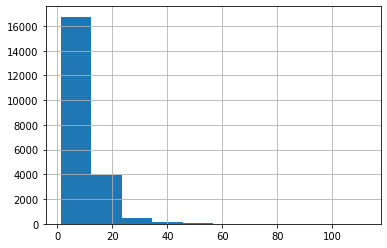

In [ ]:
data['kitchen_area'].hist()

In [ ]:
data['kitchen_area'].describe()

count   21367.000
mean       10.559
std         5.896
min         1.300
25%         7.000
50%         9.100
75%        12.000
max       112.000
Name: kitchen_area, dtype: float64

In [ ]:
data[data['kitchen_area'] < 3]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.000,27.000,2017-07-10T00:00:00,1,2.750,23.000,18.000,18,NaN,False,False,2.000,0.000,Санкт-Петербург,22131.000,17459.000,0.000,NaN,1.000,411.000,10.000
6262,9,3100000.000,24.000,2018-06-25T00:00:00,2,3.000,5.000,16.000,5,NaN,False,False,2.000,NaN,Санкт-Петербург,31960.000,4914.000,2.000,426.000,1.000,936.000,54.000
7950,3,5967734.000,66.400,2017-02-07T00:00:00,2,2.650,4.000,44.400,2,False,False,False,2.890,NaN,Санкт-Петербург,44870.000,20802.000,0.000,NaN,0.000,NaN,335.000
8729,9,2200000.000,18.400,2018-08-20T00:00:00,1,2.520,3.000,14.000,3,NaN,False,False,2.400,NaN,Пушкин,20710.000,30687.000,0.000,NaN,1.000,155.000,59.000
9138,17,2920000.000,23.290,2018-12-12T00:00:00,1,2.650,3.000,21.000,1,NaN,False,False,2.000,NaN,Санкт-Петербург,19506.000,4008.000,0.000,NaN,2.000,45.000,107.000
11033,6,5350000.000,32.000,2016-04-20T00:00:00,1,2.650,14.000,16.000,10,NaN,False,False,2.000,0.000,Санкт-Петербург,19008.000,3953.000,0.000,NaN,1.000,69.000,210.000
16367,2,2720000.000,25.700,2017-10-30T00:00:00,1,2.650,19.000,22.600,11,NaN,False,False,2.000,NaN,Санкт-Петербург,14472.000,13268.000,0.000,NaN,0.000,NaN,109.000
17834,5,2940000.000,34.700,2017-10-09T00:00:00,1,2.650,26.000,15.500,14,NaN,False,False,2.300,1.000,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,318.000
19642,5,1190000.000,14.000,2018-07-29T00:00:00,1,2.650,5.000,11.000,1,NaN,False,False,2.000,NaN,Санкт-Петербург,9898.000,11122.000,0.000,NaN,0.000,NaN,4.000
20217,7,4250000.000,28.500,2019-05-01T00:00:00,1,2.800,14.000,19.500,10,NaN,False,False,1.300,NaN,Санкт-Петербург,37199.000,12721.000,0.000,NaN,0.000,NaN,NaN


In [ ]:
data = data[~(data['kitchen_area'] < 3)]

Так же удалил аномально маленькие кухни

# Балконы

<AxesSubplot:>

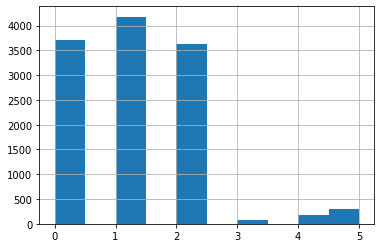

In [ ]:
data['balcony'].hist()

In [ ]:
data['balcony'] = data['balcony'].fillna(0)

<AxesSubplot:>

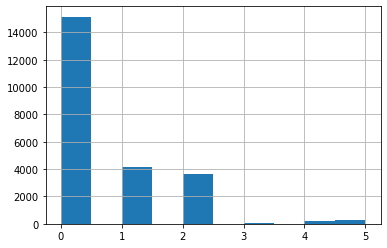

In [ ]:
data['balcony'].hist()

С балконами данные странные, есть 1 комнатная квартира с 5 балконами, эти квартиры можно было бы удалить, но так как количество балконов не нужно нам для рассчетов дальнейших, я не стал ничего менять, только заполнил пропуски 0

# Населенный пункт

In [ ]:
data['locality_name'] = data['locality_name'].fillna('нет данных')

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [ ]:
data['locality_name'] = data['locality_name'].str.replace('посёлок','поселок')

In [ ]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'поселок Шушары', 'городской поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'поселок Металлострой',
       'поселок городского типа Лебяжье',
       'поселок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок городского типа Ефимовский', 'поселок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет

In [ ]:
data[data['locality_name'] == 'поселок городского типа Рябово']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3930,2,1600000.000,40.000,2015-12-10T00:00:00,1,2.650,4.000,18.000,4,False,False,False,12.000,0.000,поселок городского типа Рябово,NaN,NaN,NaN,NaN,NaN,NaN,199.000
11118,15,1250000.000,37.400,2017-06-13T00:00:00,1,2.750,3.000,18.900,2,NaN,False,False,10.000,0.000,поселок городского типа Рябово,NaN,NaN,NaN,NaN,NaN,NaN,647.000


In [ ]:
data[data['locality_name'] == 'поселок Рябово']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1611,5,1850000.000,71.500,2017-08-01T00:00:00,3,2.550,5.000,42.700,3,NaN,False,False,8.500,0.000,поселок Рябово,NaN,NaN,NaN,NaN,NaN,NaN,49.000
6465,14,1850000.000,73.000,2016-01-13T00:00:00,3,2.550,5.000,42.700,3,NaN,False,False,8.300,0.000,поселок Рябово,NaN,NaN,NaN,NaN,NaN,NaN,1100.000


In [ ]:
data['locality_name'] = data['locality_name'].replace('поселок городского типа Рябово', 'поселок Рябово')

In [ ]:
data[data['locality_name'] == 'поселок городского типа Рябово']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Постарался убрать неявные дубликаты в этом столбце.

# Близость аэропорта

<AxesSubplot:>

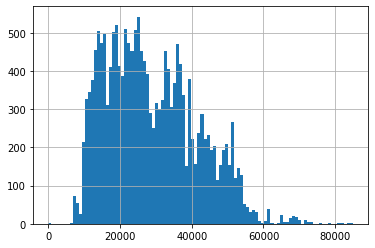

In [ ]:
data['airports_nearest'].hist(bins = 100)


Санкт- Петербург как раз начинается примено с 7 км от Пулково и заканчивается примерно на 55км


# Близость к центру

<AxesSubplot:>

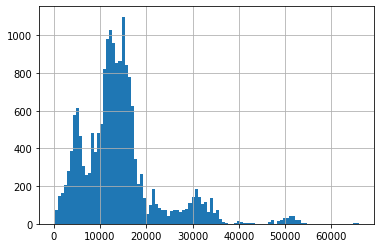

In [ ]:
data['cityCenters_nearest'].hist(bins = 100)

In [ ]:
data[data['cityCenters_nearest'] > 60000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
577,7,4000000.000,59.000,2017-07-23T00:00:00,3,2.500,5.000,37.000,1,False,False,False,7.000,0.000,поселок Молодёжное,84665.000,65764.000,0.000,NaN,0.000,NaN,NaN
2974,13,3200000.000,46.300,2018-03-31T00:00:00,2,2.500,3.000,29.200,2,NaN,False,False,7.000,1.000,Зеленогорск,81355.000,62454.000,0.000,NaN,0.000,NaN,205.000
5218,15,3650000.000,53.800,2018-09-24T00:00:00,3,2.500,4.000,36.900,3,NaN,False,False,5.200,0.000,поселок Молодёжное,83758.000,64857.000,0.000,NaN,0.000,NaN,121.000
5340,19,3600000.000,50.600,2019-03-19T00:00:00,2,2.500,5.000,29.900,4,NaN,False,False,7.000,1.000,поселок Молодёжное,84853.000,65952.000,0.000,NaN,0.000,NaN,NaN
9640,8,4200000.000,51.400,2014-12-10T00:00:00,2,2.550,5.000,31.000,2,NaN,False,False,6.000,1.000,поселок Молодёжное,84869.000,65968.000,0.000,NaN,0.000,NaN,1194.000
16569,13,3200000.000,52.800,2017-06-20T00:00:00,2,2.550,5.000,29.900,3,NaN,False,False,8.300,0.000,Ломоносов,53042.000,61495.000,2.000,223.000,0.000,NaN,240.000
18884,15,3600000.000,57.600,2019-02-08T00:00:00,3,2.550,3.000,41.300,2,NaN,False,False,6.500,1.000,Зеленогорск,81607.000,62706.000,0.000,NaN,0.000,NaN,13.000
20746,1,3300000.000,43.500,2016-02-16T00:00:00,2,2.550,4.000,27.200,2,NaN,False,False,5.000,1.000,поселок Молодёжное,84006.000,65105.000,0.000,NaN,0.000,NaN,1043.000
23123,0,1800000.000,32.000,2018-07-17T00:00:00,1,2.650,2.000,17.000,1,NaN,False,False,6.000,0.000,Ломоносов,56896.000,60223.000,1.000,17.000,0.000,NaN,147.000



Примерный радиус Питера 20 км, так что тут логичен пик как раз на этом отрезке. Проверил на выбросы самые далекие значения, Молодежное это действительно самый дальний край, а Зеленогорск рядом.


# Парки

<AxesSubplot:>

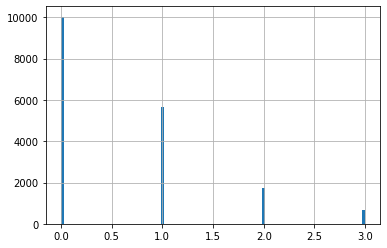

In [ ]:
data['parks_around3000'].hist(bins = 100)


В большинстве случаев в ближайших окресностях квартиры нет парков. 1, 2 и 3 парка встречаются, 1 чаще, 3 реже


<AxesSubplot:>

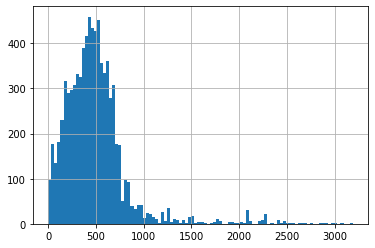

In [ ]:
data['parks_nearest'].hist(bins = 100)

 
Если парки и есть в окресностях, то в основном они в радиусе километра от квартиры.


# Водоемы

<AxesSubplot:>

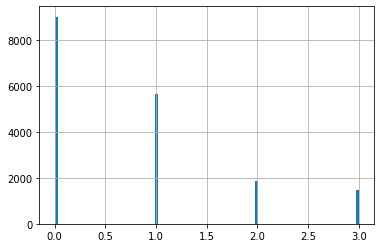

In [ ]:
data['ponds_around3000'].hist(bins = 100)


С водоемами история ровно такая же как с парками.


<AxesSubplot:>

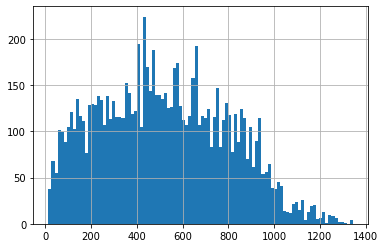

In [ ]:
data['ponds_nearest'].hist(bins = 100)


И в случае с дальностью тоже.


# Дни на продаже

<AxesSubplot:>

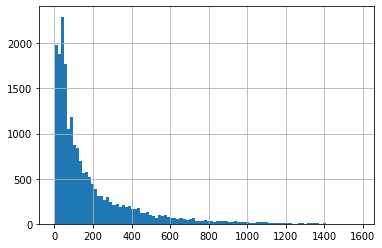

In [ ]:
data['days_exposition'].hist(bins = 100)

In [ ]:
data[data['days_exposition'] > 1400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
521,20,25717300.000,230.100,2015-01-21T00:00:00,3,2.650,3.000,130.000,1,NaN,False,False,26.100,1.000,Пушкин,16877.000,29030.000,2.000,676.000,3.000,278.000,1441.000
1109,1,34878556.000,95.800,2014-12-09T00:00:00,2,2.650,6.000,58.300,5,True,False,False,20.000,1.000,Санкт-Петербург,21860.000,318.000,2.000,160.000,3.000,569.000,1572.000
1885,2,13300000.000,79.600,2014-12-09T00:00:00,2,3.000,8.000,42.700,7,NaN,False,False,18.000,0.000,Санкт-Петербург,39393.000,11096.000,1.000,537.000,0.000,NaN,1513.000
2941,3,10090000.000,71.900,2015-02-02T00:00:00,2,2.650,10.000,34.100,9,NaN,False,False,16.800,2.000,Санкт-Петербург,23604.000,5294.000,0.000,NaN,1.000,434.000,1458.000
4736,11,6650000.000,68.300,2015-02-19T00:00:00,4,2.630,5.000,45.100,4,NaN,False,False,9.000,0.000,Санкт-Петербург,20182.000,1724.000,3.000,606.000,3.000,453.000,1477.000
6006,4,4400000.000,38.630,2015-02-03T00:00:00,1,2.850,25.000,15.000,6,NaN,False,False,12.300,2.000,поселок Парголово,52611.000,18783.000,0.000,NaN,0.000,NaN,1452.000
6691,3,4400000.000,42.980,2014-12-12T00:00:00,1,2.650,5.000,18.720,1,NaN,False,False,11.310,0.000,Пушкин,19715.000,30358.000,1.000,439.000,3.000,232.000,1512.000
6726,6,11995000.000,83.820,2014-11-27T00:00:00,2,2.730,11.000,42.310,1,NaN,False,False,17.850,0.000,Санкт-Петербург,39946.000,10720.000,1.000,2102.000,3.000,303.000,1406.000
9553,11,10600000.000,80.000,2014-12-09T00:00:00,3,2.850,17.000,44.000,9,NaN,False,False,15.000,0.000,Санкт-Петербург,17101.000,17110.000,0.000,NaN,0.000,NaN,1553.000
9555,11,9950000.000,61.200,2015-04-06T00:00:00,2,3.170,7.000,39.700,2,NaN,False,False,8.000,0.000,Санкт-Петербург,9740.000,10123.000,1.000,114.000,0.000,NaN,1434.000



Обычно квартиры продаются за 200 дней, ниже я провел анализ.


# Преобразование даты

In [ ]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

In [ ]:
data = data.reset_index()

In [ ]:
data

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,NaN,False,False,25.000,0.000,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN
1,1,7,3350000.000,40.400,2018-12-04,1,2.650,11.000,18.600,1,NaN,False,False,11.000,2.000,поселок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000
2,2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000
3,3,0,64900000.000,159.000,2015-07-24,3,2.650,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000
4,4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,NaN,False,False,41.000,0.000,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,23694,9,9700000.000,133.810,2017-03-21,3,3.700,5.000,73.300,3,NaN,False,False,13.830,0.000,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,NaN
23522,23695,14,3100000.000,59.000,2018-01-15,3,2.650,5.000,38.000,4,NaN,False,False,8.500,0.000,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.000
23523,23696,18,2500000.000,56.700,2018-02-11,2,2.650,3.000,29.700,1,NaN,False,False,NaN,0.000,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23524,23697,13,11475000.000,76.750,2017-03-28,2,3.000,17.000,NaN,12,NaN,False,False,23.300,2.000,Санкт-Петербург,39140.000,10364.000,2.000,173.000,3.000,196.000,602.000


### Посчитайте и добавьте в таблицу новые столбцы

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23526 entries, 0 to 23525
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 23526 non-null  int64         
 1   total_images          23526 non-null  int64         
 2   last_price            23526 non-null  float64       
 3   total_area            23526 non-null  float64       
 4   first_day_exposition  23526 non-null  datetime64[ns]
 5   rooms                 23526 non-null  int64         
 6   ceiling_height        23526 non-null  float64       
 7   floors_total          23526 non-null  float64       
 8   living_area           21660 non-null  float64       
 9   floor                 23526 non-null  int64         
 10  is_apartment          2773 non-null   object        
 11  studio                23526 non-null  bool          
 12  open_plan             23526 non-null  bool          
 13  kitchen_area    

In [ ]:
data['price_m2'] = data['last_price']/data['total_area']

In [ ]:
data['weekday'] = data['first_day_exposition'].dt.weekday

In [ ]:
data['month'] = data['first_day_exposition'].dt.month

In [ ]:
data['year'] = data['first_day_exposition'].dt.year

In [ ]:
def floor_cat (row):
    if row['floor'] == 1:
        return 'первый'
    if row['floors_total']  == row['floor']:
        return 'последний'
    else:
        return 'другой'

In [ ]:
data['floor_type'] = data.apply(floor_cat, axis=1)
data['floor_type'].value_counts()

другой       17294
последний     3326
первый        2906
Name: floor_type, dtype: int64

In [ ]:
data['cityCenters_nearest_km'] = (data['cityCenters_nearest']/1000).round()

In [ ]:
data

,index,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_m2,weekday,month,year,floor_type,cityCenters_nearest_km
0,0,20,13000000.000,108.000,2019-03-07,3,2.700,16.000,51.000,8,NaN,False,False,25.000,0.000,Санкт-Петербург,18863.000,16028.000,1.000,482.000,2.000,755.000,NaN,120370.370,3,3,2019,другой,16.000
1,1,7,3350000.000,40.400,2018-12-04,1,2.650,11.000,18.600,1,NaN,False,False,11.000,2.000,поселок Шушары,12817.000,18603.000,0.000,NaN,0.000,NaN,81.000,82920.792,1,12,2018,первый,19.000
2,2,10,5196000.000,56.000,2015-08-20,2,2.650,5.000,34.300,4,NaN,False,False,8.300,0.000,Санкт-Петербург,21741.000,13933.000,1.000,90.000,2.000,574.000,558.000,92785.714,3,8,2015,другой,14.000
3,3,0,64900000.000,159.000,2015-07-24,3,2.650,14.000,NaN,9,NaN,False,False,NaN,0.000,Санкт-Петербург,28098.000,6800.000,2.000,84.000,3.000,234.000,424.000,408176.101,4,7,2015,другой,7.000
4,4,2,10000000.000,100.000,2018-06-19,2,3.030,14.000,32.000,13,NaN,False,False,41.000,0.000,Санкт-Петербург,31856.000,8098.000,2.000,112.000,1.000,48.000,121.000,100000.000,1,6,2018,другой,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23521,23694,9,9700000.000,133.810,2017-03-21,3,3.700,5.000,73.300,3,NaN,False,False,13.830,0.000,Санкт-Петербург,24665.000,4232.000,1.000,796.000,3.000,381.000,NaN,72490.845,1,3,2017,другой,4.000
23522,23695,14,3100000.000,59.000,2018-01-15,3,2.650,5.000,38.000,4,NaN,False,False,8.500,0.000,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.000,52542.373,0,1,2018,другой,NaN
23523,23696,18,2500000.000,56.700,2018-02-11,2,2.650,3.000,29.700,1,NaN,False,False,NaN,0.000,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44091.711,6,2,2018,первый,NaN
23524,23697,13,11475000.000,76.750,2017-03-28,2,3.000,17.000,NaN,12,NaN,False,False,23.300,2.000,Санкт-Петербург,39140.000,10364.000,2.000,173.000,3.000,196.000,602.000,149511.401,1,3,2017,другой,10.000



Дополнительные данные рассчитаны и добавлены. Можно приступать к исследованию

# Проведите исследовательский анализ данных

In [ ]:
data = data.reset_index(drop = True)

<AxesSubplot:>

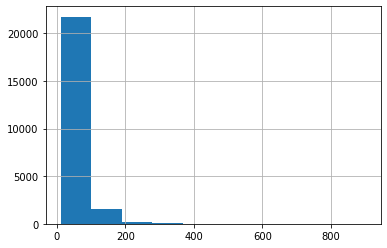

In [ ]:
data['total_area'].hist()

In [ ]:
data['total_area'].describe()

count   23526.000
mean       60.432
std        35.599
min        12.000
25%        40.000
50%        52.000
75%        70.000
max       900.000
Name: total_area, dtype: float64

Большинство квартир имеют площадь до 100м2, небольшое количество до 200м2, среднее значение 60м2, медианное 52м2.
Минимальная площадь - 12м2, максимальная - 900м2.

<AxesSubplot:>

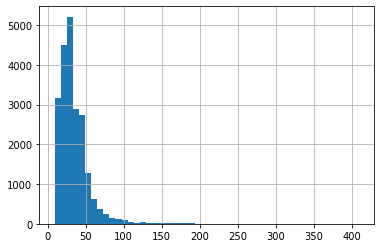

In [ ]:
data['living_area'].hist(bins = 50)

In [ ]:
data['living_area'].describe()

count   21660.000
mean       34.531
std        22.048
min         9.000
25%        18.700
50%        30.000
75%        42.400
max       409.700
Name: living_area, dtype: float64

Большинство квартир имеют жилую площадь до 50м2, небольшое количество от 100 до 200м2, среднее значение 34,5м2, медианное 30м2.
Минимальная жилая площадь - 9м2, максимальная - 409м2. 

<AxesSubplot:>

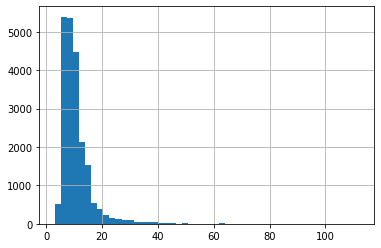

In [ ]:
data['kitchen_area'].hist(bins = 50)

In [ ]:
data['kitchen_area'].describe()

count   21356.000
mean       10.563
std         5.894
min         3.000
25%         7.000
50%         9.100
75%        12.000
max       112.000
Name: kitchen_area, dtype: float64

Большинство квартир имеют кухню площадью до 10м2, небольшое количество от 10 до 200м2, среднее значение 10,5м2, медианное 9м2.
Минимальная площадь кухни - 3м2, максимальная - 112м2. 

<AxesSubplot:>

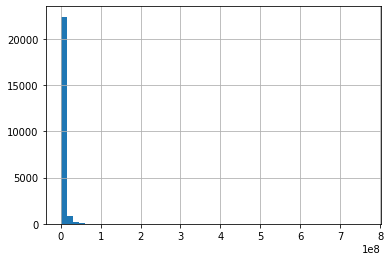

In [ ]:
data['last_price'].hist(bins = 50)

<AxesSubplot:>

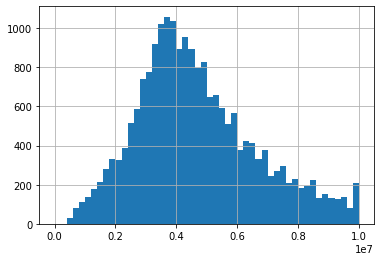

In [ ]:
data['last_price'].hist(bins = 50, range = (0,10000000))

In [ ]:
data['last_price'].describe()

count       23526.000
mean      6547753.472
std      10904898.507
min        430000.000
25%       3444250.000
50%       4650000.000
75%       6800000.000
max     763000000.000
Name: last_price, dtype: float64

У большей части квартир цена от 2 до 8 миллионов. Средняя цена 6541157, медианная 4650000. Минимальная 430000, максимальная 763000000. Из-за большого количества очень дорогих квартир, средняя цена сильно отличается от медианной. 

<AxesSubplot:>

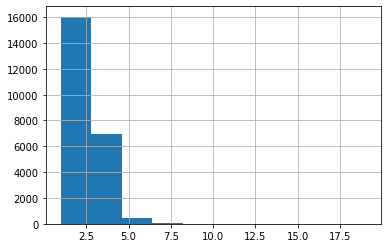

In [ ]:
data['rooms'].hist()

In [ ]:
data['rooms'].value_counts()

1     8131
2     7906
3     5794
4     1176
5      325
6      104
7       59
8       12
9        8
10       3
11       2
14       2
16       1
19       1
12       1
15       1
Name: rooms, dtype: int64

большая часть квартир 1,2 и 3комнатные, есть небольшое количество 4 и 5 комнатных, квартир, где комнат больше 8 совсем мало.
квартиры студии считаются, как однокомнатные.

<AxesSubplot:>

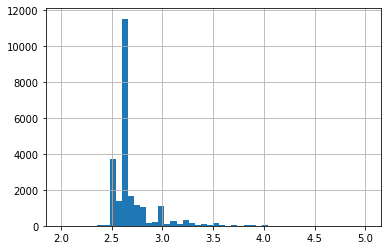

In [ ]:
data['ceiling_height'].hist(bins = 50)

Большинство квартир имеет потолки от 2,5 до 2,65м высоты. Большое количество значений изменено на медианные.

<AxesSubplot:>

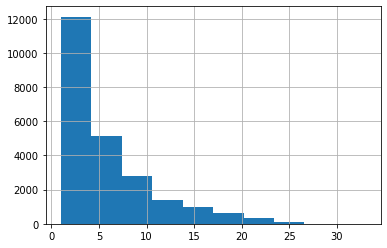

In [ ]:
data['floor'].hist()

In [ ]:
data['floor'].value_counts()

2     3359
3     3063
1     2906
4     2789
5     2613
6     1290
7     1210
8     1069
9     1040
10     680
12     520
11     514
13     374
15     339
14     333
16     313
17     222
18     173
19     142
21     119
22     110
20     107
23      98
24      60
25      44
26      23
27      10
28       1
29       1
32       1
30       1
33       1
31       1
Name: floor, dtype: int64

Больше всего квартир на этажах с 1 по 5, наименьшее с 26 по 33

<AxesSubplot:>

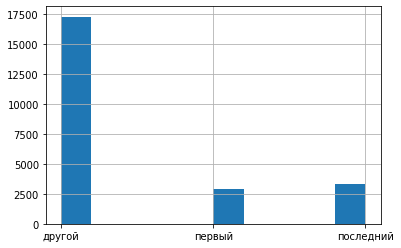

In [ ]:
data['floor_type'].hist()

In [ ]:
data['floor_type'].value_counts()

другой       17294
последний     3326
первый        2906
Name: floor_type, dtype: int64

Квартир на первом и последнем этажах немного по сравнению с остальными.

<AxesSubplot:>

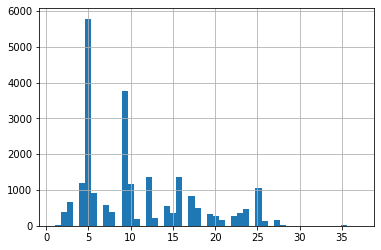

In [ ]:
data['floors_total'].hist(bins = 50)

In [ ]:
data['floors_total'].value_counts()

5.000     5783
9.000     3754
16.000    1373
12.000    1359
4.000     1198
10.000    1172
25.000    1064
6.000      912
17.000     830
3.000      666
7.000      590
14.000     546
18.000     500
24.000     463
8.000      386
2.000      383
15.000     364
23.000     350
19.000     337
22.000     281
20.000     268
13.000     229
11.000     202
27.000     162
21.000     156
26.000     122
1.000       25
35.000      23
28.000      21
36.000       3
37.000       1
33.000       1
29.000       1
34.000       1
Name: floors_total, dtype: int64

Больше всего квартир в 5 и 9 этажных домах, а квартир в домах выше 30 этажей совсем немного

<AxesSubplot:>

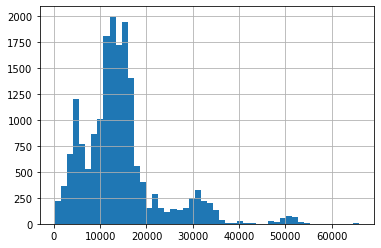

In [ ]:
data['cityCenters_nearest'].hist(bins = 50)

Основная масса квартир находится в радиусе 20км, но есть и отдаленные - больше 60

<AxesSubplot:>

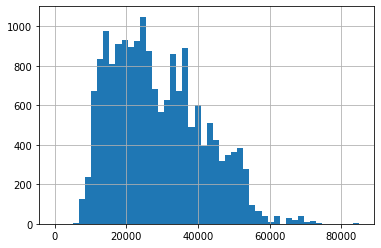

In [ ]:
data['airports_nearest'].hist(bins = 50)

Основная масса квартир находится на рассотянии от 10 до примерно 55 км.

<AxesSubplot:>

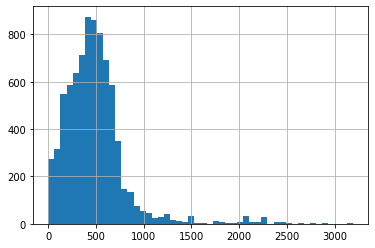

In [ ]:
data['parks_nearest'].hist(bins = 50)

У большинства квартир парк менее чем в километре.

<AxesSubplot:>

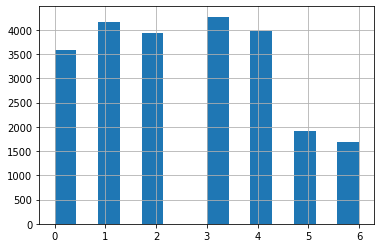

In [ ]:
data['weekday'].hist(bins = 14)

В основном объявления размещают с понедельника по пятницу, на выходных реже.

<AxesSubplot:>

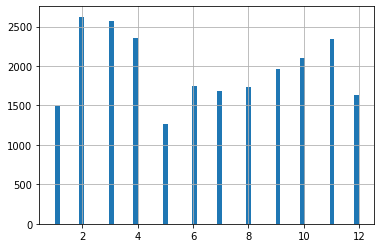

In [ ]:
data['month'].hist(bins = 62)

Обыявления чаще выкладывают в начале месяца и в конце

# Скорость продажи


<AxesSubplot:>

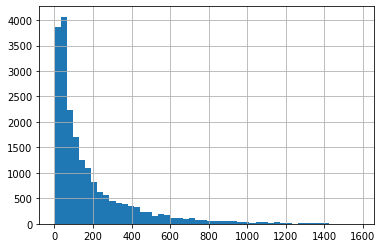

In [ ]:
data['days_exposition'].hist(bins = 50)

In [ ]:
data['days_exposition'].describe()

count   20357.000
mean      181.261
std       219.962
min         1.000
25%        45.000
50%        96.000
75%       232.000
max      1580.000
Name: days_exposition, dtype: float64

В среднем квартиры продаются за 181 день, медианное значение 96. Самая быстрая продажа 1 день, самая медленная 1580 дней.
Медианное значение можно принять за нормальное для продажи, тоесть в норме квартира продается за 100 дней.
Все что быстрее можно считать быстрой продажей. Предположу, что долгой продажей можно считать все что больше 3 квартиля - 232 дней. Ну а все что продается больше года, то это можно назвать необычно долгими продажами.

# Влияние на общую цену

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23526 entries, 0 to 23525
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   index                   23526 non-null  int64         
 1   total_images            23526 non-null  int64         
 2   last_price              23526 non-null  float64       
 3   total_area              23526 non-null  float64       
 4   first_day_exposition    23526 non-null  datetime64[ns]
 5   rooms                   23526 non-null  int64         
 6   ceiling_height          23526 non-null  float64       
 7   floors_total            23526 non-null  float64       
 8   living_area             21660 non-null  float64       
 9   floor                   23526 non-null  int64         
 10  is_apartment            2773 non-null   object        
 11  studio                  23526 non-null  bool          
 12  open_plan               23526 non-null  bool  

In [ ]:
data['last_price'].corr(data['total_area'], method='spearman')

0.7474687803121817

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

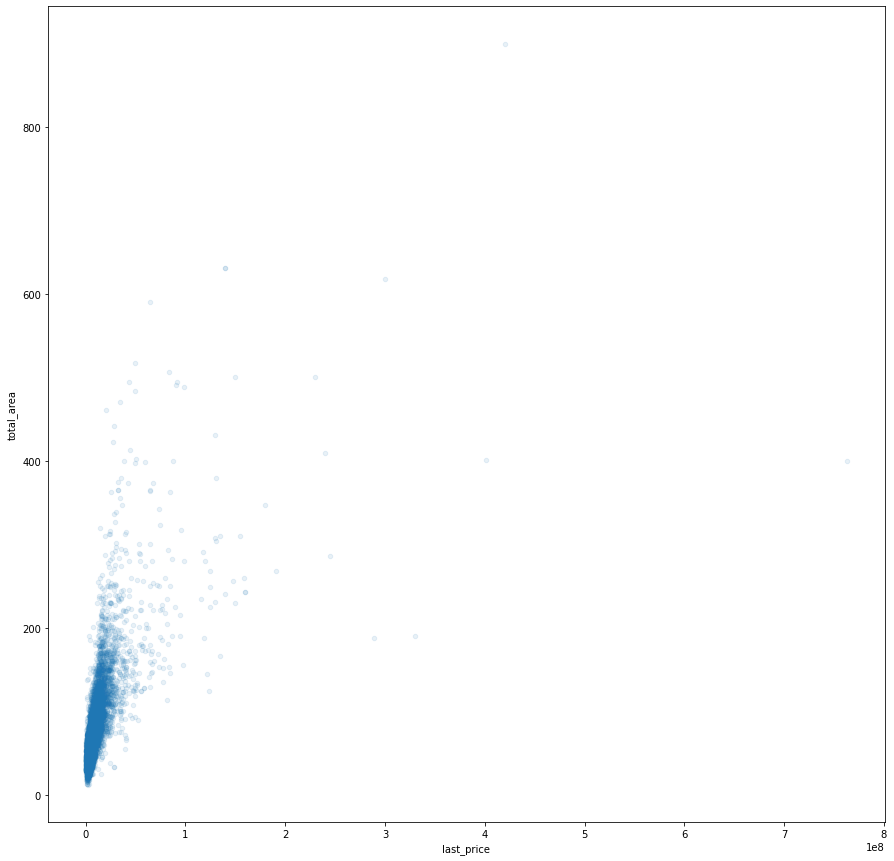

In [ ]:
data.plot(x = 'last_price', y = 'total_area', figsize = (15, 15), kind ='scatter', alpha = 0.1)

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

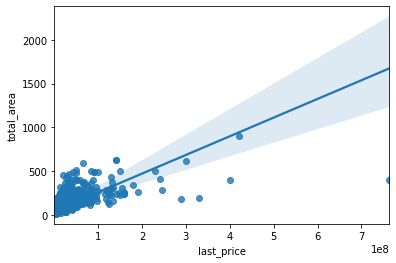

In [ ]:
sns.regplot(x = 'last_price', y = 'total_area', data = data)

(0.0, 500.0)

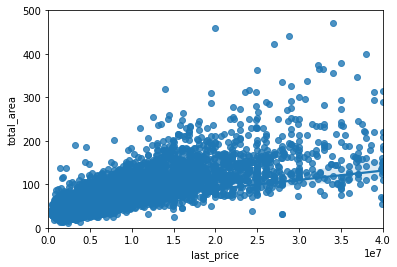

In [ ]:
sns.regplot(x = 'last_price', y = 'total_area', data = data)

plt.xlim(0, 4*10**7)
plt.ylim(0, 500) 

Есть достаточно сильная зависимость.

In [ ]:
data['last_price'].corr(data['living_area'], method='spearman')

0.6400147922491402

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

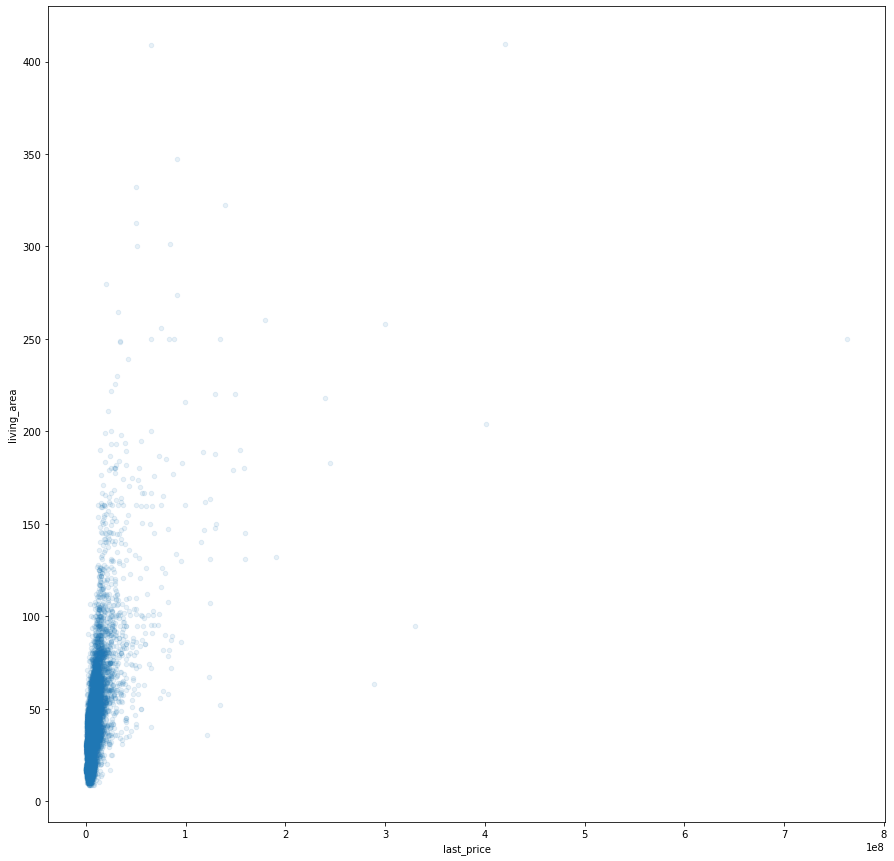

In [ ]:
data.plot(x = 'last_price', y = 'living_area', figsize = (15, 15), kind ='scatter', alpha = 0.1)

(0.0, 600.0)

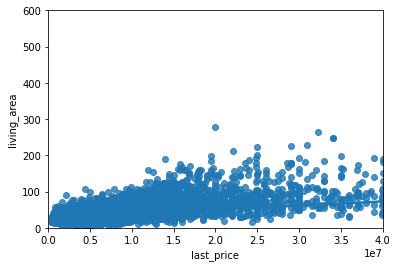

In [ ]:
sns.regplot(x = 'last_price', y = 'living_area', data = data)

plt.xlim(0, 4*10**7)
plt.ylim(0, 600)

Зависимость есть, но слабее, чем в случае с общей площадью

In [ ]:
data['last_price'].corr(data['kitchen_area'], method='spearman')

0.5808906467312216

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

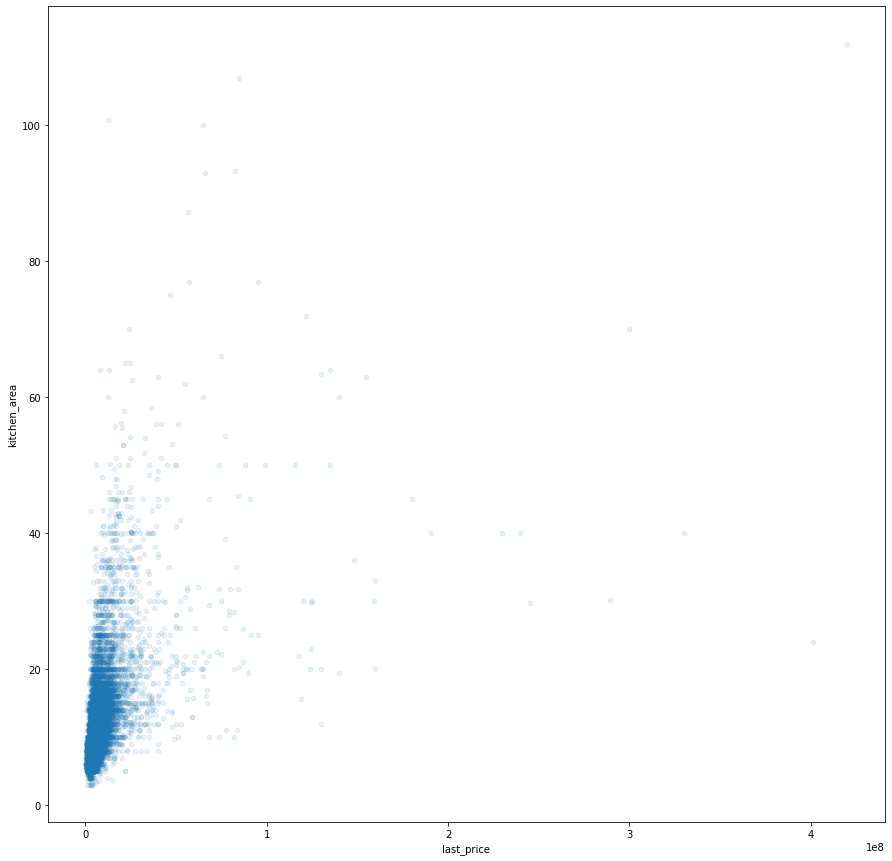

In [ ]:
data.plot(x = 'last_price', y = 'kitchen_area', figsize = (15, 15), kind ='scatter', alpha = 0.1)

(0.0, 100.0)

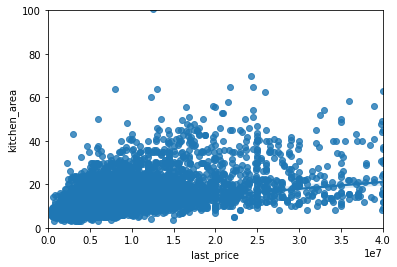

In [ ]:
sns.regplot(x = 'last_price', y = 'kitchen_area', data = data)

plt.xlim(0, 4*10**7)
plt.ylim(0, 100)

Зависимость есть, но слабее, чем в двух предыдущих случаях

In [ ]:
data['last_price'].corr(data['rooms'], method='spearman')

0.5360321411236171

<AxesSubplot:xlabel='rooms'>

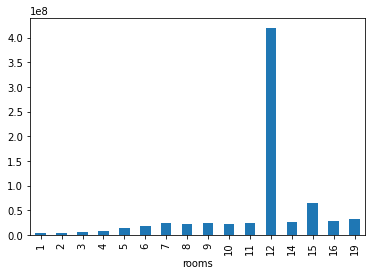

In [ ]:
data.groupby('rooms')['last_price'].median().plot(kind='bar')

<AxesSubplot:xlabel='rooms'>

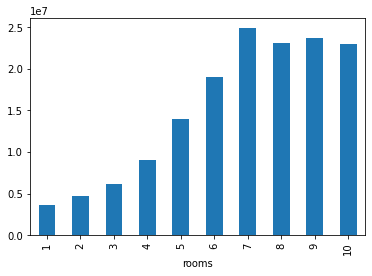

In [ ]:
data[data['rooms'] <= 10].groupby('rooms')['last_price'].median().plot(kind='bar')

До 7 комнат зависимость линийная, а вот после количество комнат не влияет на цену. Но выборка квартир с таким количеством комнат мне кажется нерепрезентативной

<AxesSubplot:xlabel='floor_type'>

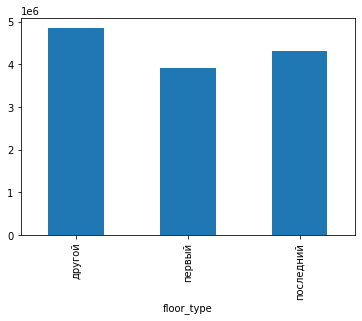

In [ ]:
data.groupby('floor_type')['last_price'].median().plot(kind='bar')

Медианная квартира на 1 этаже дешевле медианной на последней, квартиры на других этажах дороже чем на первом и последнем. 

<AxesSubplot:xlabel='weekday'>

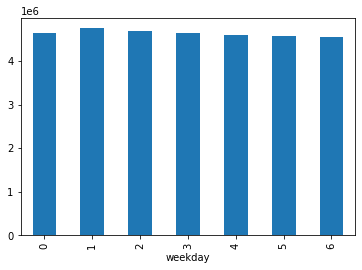

In [ ]:
data.groupby('weekday')['last_price'].median().plot(kind='bar')

<AxesSubplot:xlabel='month'>

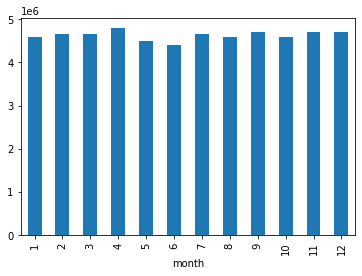

In [ ]:
data.groupby('month')['last_price'].median().plot(kind='bar')

<AxesSubplot:xlabel='year'>

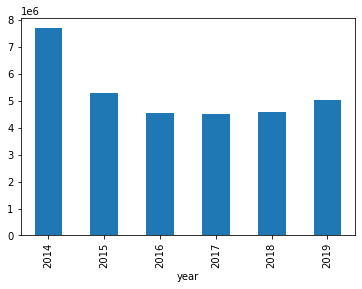

In [ ]:
data.groupby('year')['last_price'].median().plot(kind='bar')

В 2014 году продавались более дорогие квартиры, дни и месяцы размещения не играют особой роли.

# Средняя цена в 10 населенных пунктах


In [ ]:
t = data.groupby('locality_name')['price_m2'].agg(['count', 'mean'])

In [ ]:
t.sort_values(by = 'count', ascending = False).head(10)

,count,mean
locality_name,,
Санкт-Петербург,15600,114827.382
поселок Мурино,543,85421.661
поселок Шушары,438,78577.015
Всеволожск,398,68654.474
Пушкин,368,103081.147
Колпино,338,75424.579
поселок Парголово,324,90191.147
Гатчина,307,68746.147
деревня Кудрово,287,92312.310


In [ ]:
t.sort_values(by = 'mean')

,count,mean
locality_name,,
деревня Старополье,3,11206.221
поселок станции Свирь,2,11481.481
деревня Вахнова Кара,1,11688.312
деревня Выскатка,2,12335.481
поселок Совхозный,2,12629.129
...,...,...
Сестрорецк,183,101757.617
Пушкин,368,103081.147
поселок Репино,4,104238.615


Среди 10 населенных пунктов с самым большим количеством объявлений, самая дорогая недвижимость в Санкт-Петербурге, самая дешевая в Выборге.
В деревне Старополье самая низкая цена м2, а в Зеленогорске самая дорогая

# Средняя цена километра от центра Спб

<AxesSubplot:xlabel='cityCenters_nearest_km'>

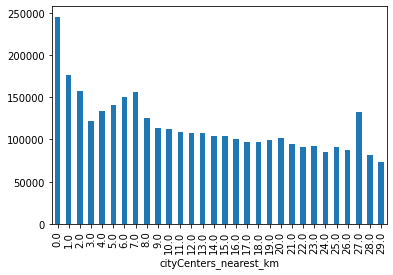

In [ ]:
t = data[data['locality_name'] == 'Санкт-Петербург']
t.groupby('cityCenters_nearest_km')['price_m2'].mean().plot(kind = 'bar')

Стоимость квартир в самом центре выше остальных, и до расстояния 7 км от центра не зависит от расстояния, дальше идет заметный тренд на снижение цены - чем дальше от центра тем дешевле, кроме 27 км от центра, стоимость там сравнима с центром.

# Общий вывод

Самые дорогие квартиры в центре Спб и Зеленогоске, не на первом и не на последнем этаже, чем больше комнат и площадь, тем квартира дороже, что вполне ожидаемо. Самые дешевые далеко в Ленинградской области, однокомнатные и на первом этаже, что тоже ожидаемо. Интересный факт что в 2014 средняя стоимость проданных квартир сильно выше, чем в последующих. Можно связать это с кризисом который наступил после "присоединения Крыма".